In [1]:
import sys, os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import corner

%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/smsharma/.conda/envs/StrongLensing-Inference/lib/python3.6/site-packages/matplotlib/__init__.py:1038: UserWarning: Bad val "$TEMPLATE_BACKEND" on line #41
	"backend      : $TEMPLATE_BACKEND
"
	in file "/Users/smsharma/.matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string '$template_backend': valid strings are ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']
  (val, error_details, msg))


In [2]:
import urllib.request
url = "https://raw.githubusercontent.com/tcollett/LensPop/master/lenses_Euclid.txt"
urllib.request.urlretrieve(url, "lenses_Euclid.txt")

('lenses_Euclid.txt', <http.client.HTTPMessage at 0x128bd30b8>)

In [3]:
lenses_Euclid = pd.read_csv("lenses_Euclid.txt", skiprows=24, header=None, delimiter=' ')

In [4]:
with open("lenses_Euclid.txt") as myfile:
    head = [next(myfile) for x in range(24)]
print(head)

['#Lens population discoverable in the Euclid\n', '#\n', '#The population was forecast by T.Collett (ICG, Portsmouth) - please cite Collett (2015)\n', '#\n', '#Each line in the table represents a single lens. The table represnts 0.1 of the full sky (i.e. each lens should be weighted by A/4200, where A is the area of the survey in square degrees)\n', '#The columns in the table are:\n', '#------------------------------------\n', '#[0] zl, lens redshift \n', '#[1] zs, source redshift \n', '#[2] b, Einstein radius (arcseconds) \n', '#[3] sig_v, lens velocity dispersion (km/s) \n', '#[4] ql, lens flattening (1=circular, q=1-e) \n', '#[5] rl, lens half light radius (arcseconds) NB/ sersic index is 4\n', '#[6] lens VIS band magnitude\n', '#[7] xs, source x coordinate relative, 0 is lens centre (arcseconds) \n', '#[8] ys, source y coordinate relative, 0 is lens centre (arcseconds) \n', '#[9] qs, source flattening (1=circular, q=1-e) \n', '#[10] ps, source position angle (degrees)\n', '#[11] rs

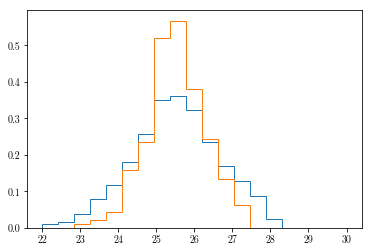

In [17]:
lenses_Euclid_sel = lenses_Euclid[(lenses_Euclid[1] > 0.) * (lenses_Euclid[1] < 20.) * (lenses_Euclid[11] < 10)]
lenses_Euclid_sel2 = lenses_Euclid[(lenses_Euclid[1] > 1.) * (lenses_Euclid[1] < 1.2) * (lenses_Euclid[11] < 0.2) * (lenses_Euclid[11] > 0.02)]

plt.hist(lenses_Euclid_sel[12], bins = np.linspace(22,30,20), histtype='step', normed=True);
plt.hist(lenses_Euclid_sel2[12], bins = np.linspace(22,30,20), histtype='step', normed=True);



In [19]:
np.mean(lenses_Euclid_sel2[12])

25.53316631130064

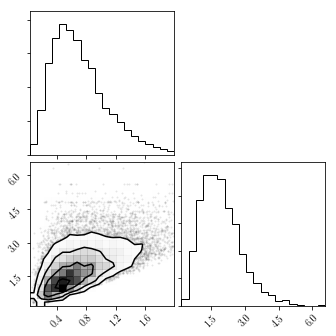

In [20]:
corner.corner(np.transpose([lenses_Euclid_sel[0], lenses_Euclid_sel[1]]));

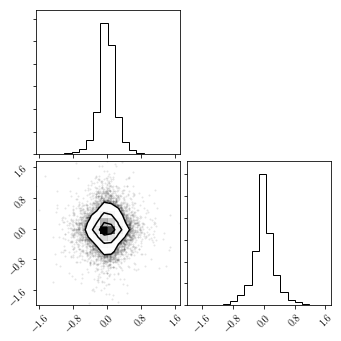

In [6]:
corner.corner(np.transpose([lenses_Euclid_sel[7], lenses_Euclid_sel[8]]));

In [9]:
sys.path.append("../../simulation/")
from units import *

In [10]:
def sigma_v(M):
    sigma_0 = 117*Kmps
    M1 = 1.5e12*M_s/h
    gamma1 = 4.3
    gamma2 = 6.79
    return sigma_0*(M/M1)**gamma1/ ((1 + M/M1)**(gamma2 - gamma1))

In [11]:
sigma_v(1e13*M_s)/Kmps

1172.543949211647